## Условие 1: Задача 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1. Скачать следующие данные: kc-house-data и laptop_price

In [2]:
df = pd.read_csv('kc-house-data.csv', encoding="windows-1251")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2. Изучите стоимости недвижимости

In [3]:
df["price"].value_counts()

price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: count, Length: 4028, dtype: int64

''

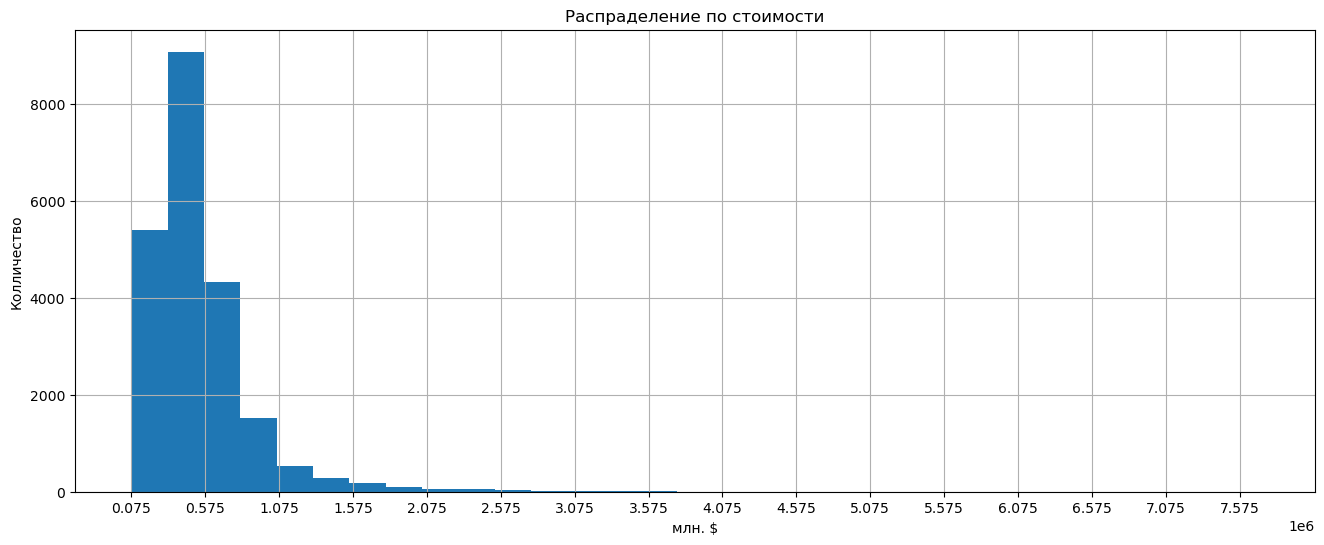

In [4]:
plt.figure(figsize=(16, 6))
plt.hist(df['price'], bins=31)
plt.title('Распраделение по стоимости')
plt.xlabel('млн. $')
plt.ylabel('Колличество')
plt.xticks(range(75000, 8000000, 500000))
plt.grid()
;

#### Больше всего домов в диапозоне стоимости  от 75000 до 575 000

### 1.3. Изучите распределение квадратуры жилой

In [5]:
df['sqft_living'].value_counts()

sqft_living
1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: count, Length: 1038, dtype: int64

''

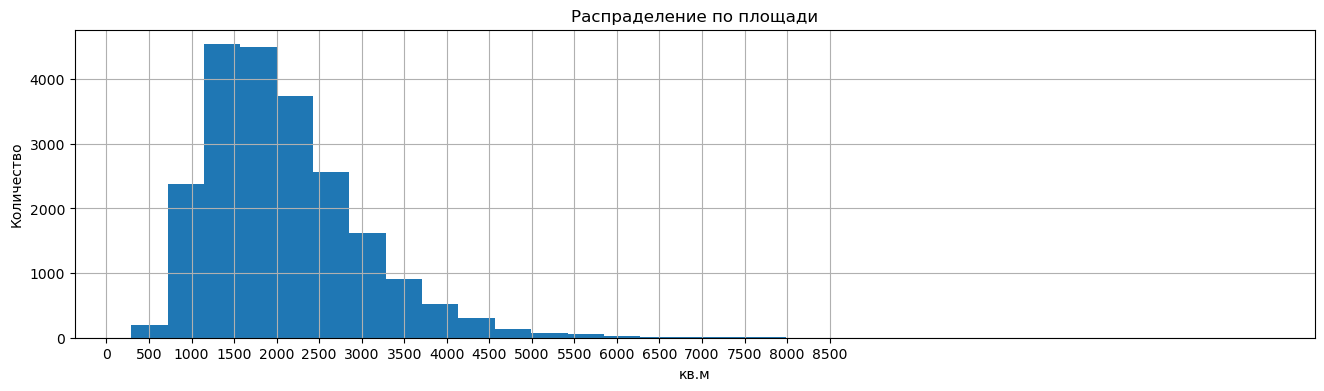

In [6]:
plt.figure(figsize=(16, 4))
plt.hist(df['sqft_living'], bins=31)
plt.title('Распраделение по площади')
plt.xlabel('кв.м')
plt.ylabel('Количество')
plt.xticks(range(0, 9000, 500))
plt.grid()
;

####  Больше всего домов площадью от 1200 до 2000 квадратных метра

### 1.4. Изучите распределение года постройки

In [7]:
df['yr_built'].value_counts()

yr_built
2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64

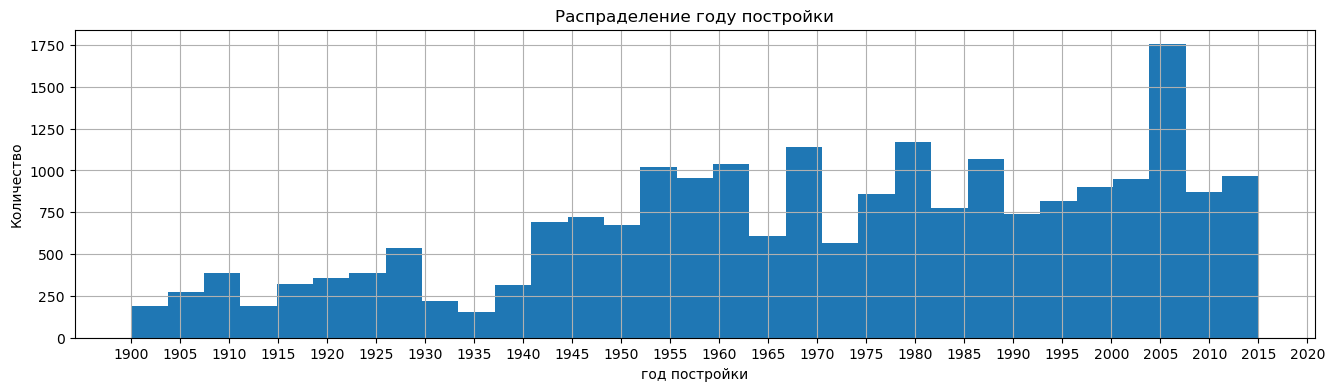

In [8]:
plt.figure(figsize=(16, 4))
plt.hist(df['yr_built'], bins=31)
plt.title('Распраделение году постройки')
plt.xlabel('год постройки')
plt.ylabel('Количество')
plt.xticks(range(1900, 2021, 5))
plt.grid()

#### Больше всего домов с годом постройки 2004 по 2007 год

### Условие 2: 2 задача

#### 2.1. Изучите распределение домов от наличия вида на набережную Постройте график

In [9]:
data = df['waterfront'].value_counts()
data

waterfront
0    21450
1      163
Name: count, dtype: int64

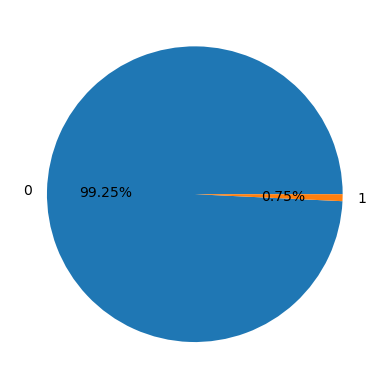

In [10]:
plt.pie(data, labels=data.index, autopct='%.2f%%');

#### Дома с видом на набержную меньше 1%

### 2.2. Изучите распределение этажей домов

In [11]:
df.sample(0)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [12]:
floors=df['floors'].value_counts()
floors

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

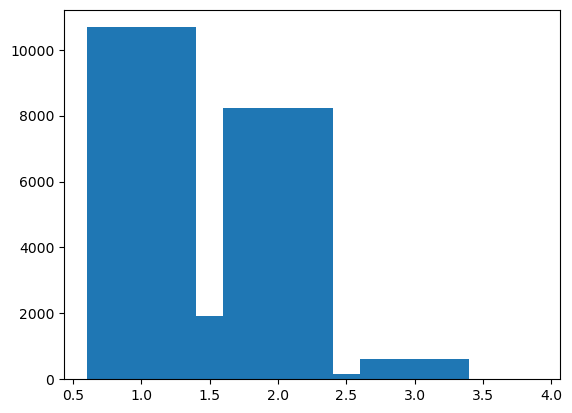

In [13]:
plt.bar(floors.index, floors);

#### Больше всего домов одно этажных

### 2.3. Изучите распределение состояния домов

In [14]:
df.sample(0)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [15]:
data=df['grade'].value_counts()
data

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

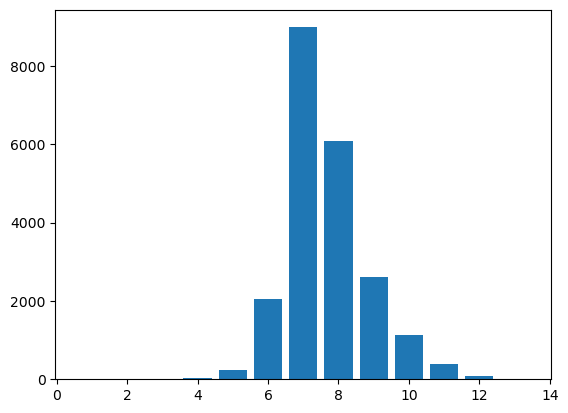

In [16]:
plt.bar(data.index, data);

#### Много жилья с средним уровенем конструкции и дизайна

## Условие 3: 3 задача

### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

In [17]:
df.sample(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4148,9358002305,20150313T000000,430000.0,2,1.0,950,6426,1.0,0,0,...,7,950,0,1949,0,98126,47.5653,-122.37,1360,2550


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


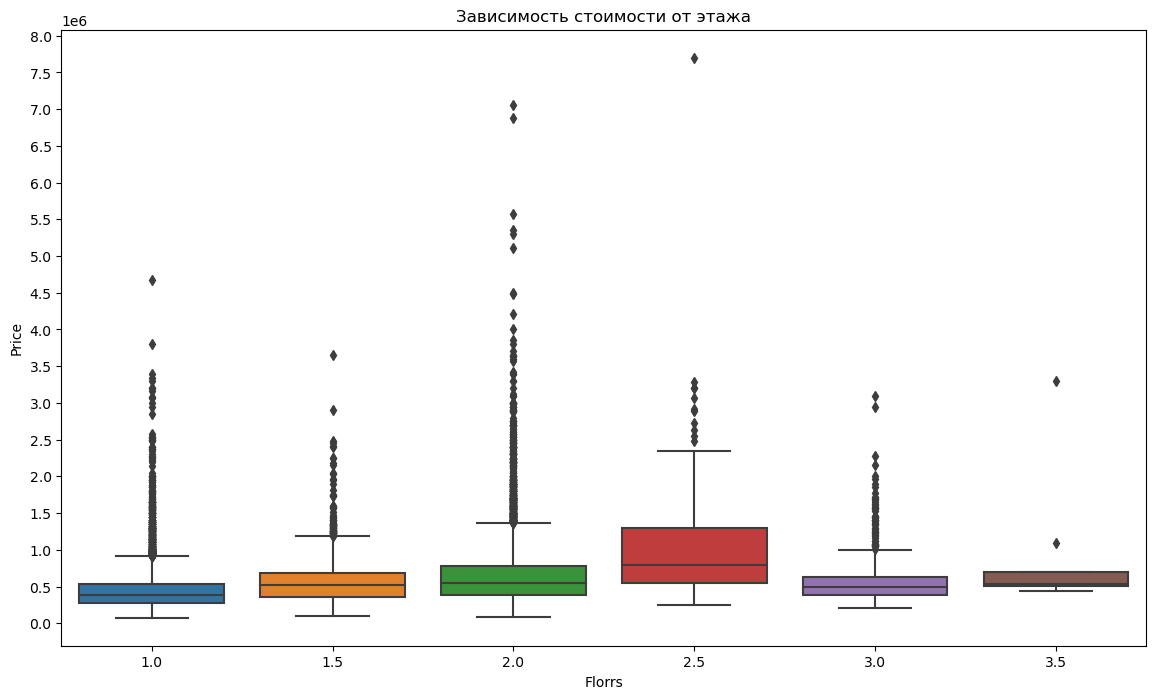

In [18]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=df['floors'], y=df['price'])
plt.yticks(range(0, 8100000, 500000))
plt.xlabel('Florrs')
plt.ylabel('Price')
plt.title('Зависимость стоимости от этажа');

#### Дома 2,5 этажа самые дорогие, 1 этаж самые дешевые

In [19]:
df.sample(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5918,6085000130,20150321T000000,230000.0,3,1.0,1140,9639,1.0,0,0,...,7,1140,0,1967,0,98001,47.3112,-122.265,1140,9639


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


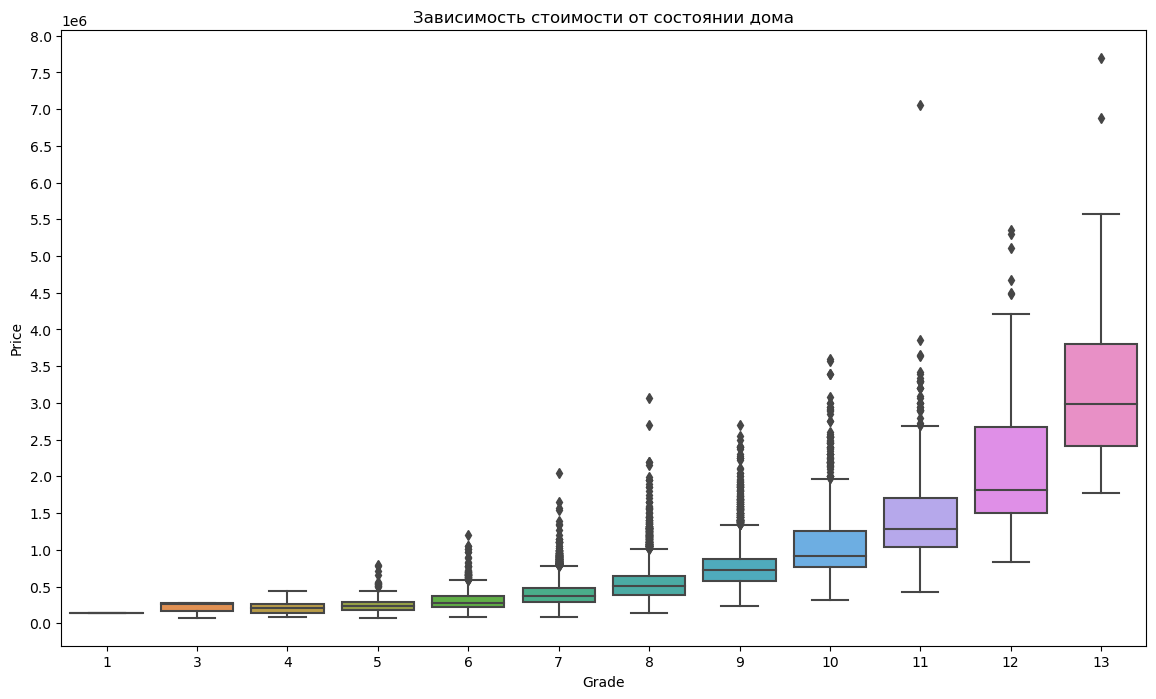

In [20]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=df['grade'], y=df['price'])
plt.yticks(range(0, 8100000, 500000))
plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('Зависимость стоимости от состоянии дома');

#### Зависимость закономерная, почти линейная.

In [21]:
df.sample(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
823,726049190,20141002T000000,287500.0,3,1.0,1810,7200,1.0,0,0,...,7,1130,680,1954,0,98133,47.7493,-122.351,1810,8100


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


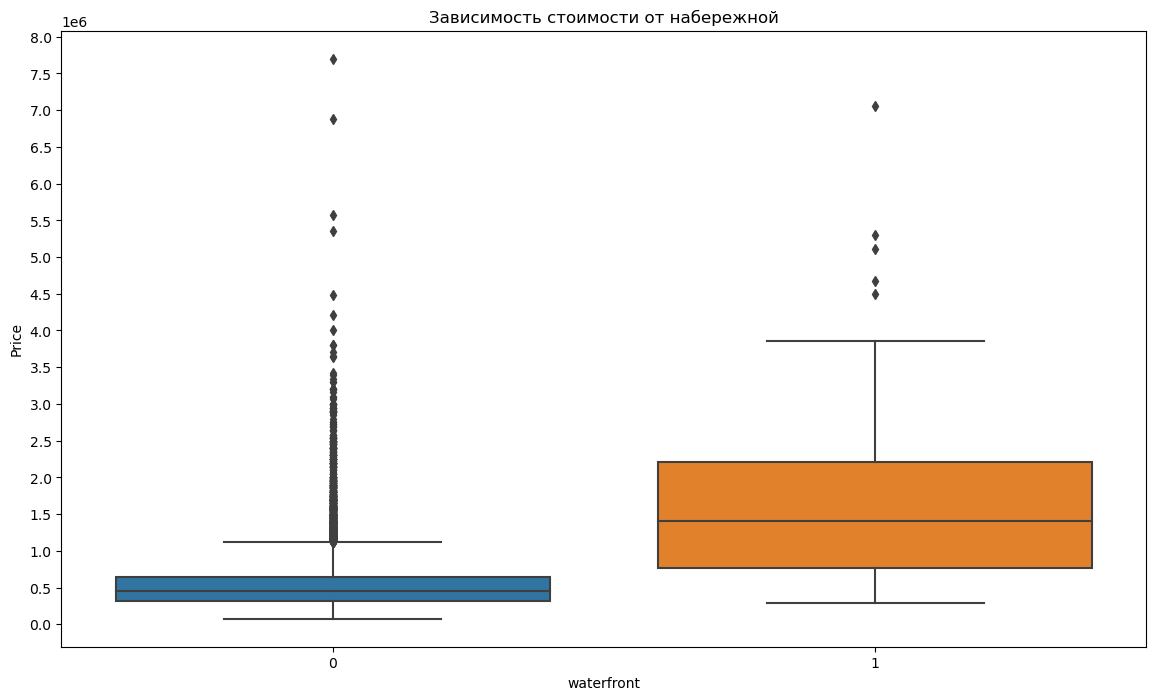

In [22]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=df['waterfront'], y=df['price'])
plt.yticks(range(0, 8100000, 500000))
plt.xlabel('waterfront')
plt.ylabel('Price')
plt.title('Зависимость стоимости от набережной');

#### Дома с набережной конечно же дороже

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


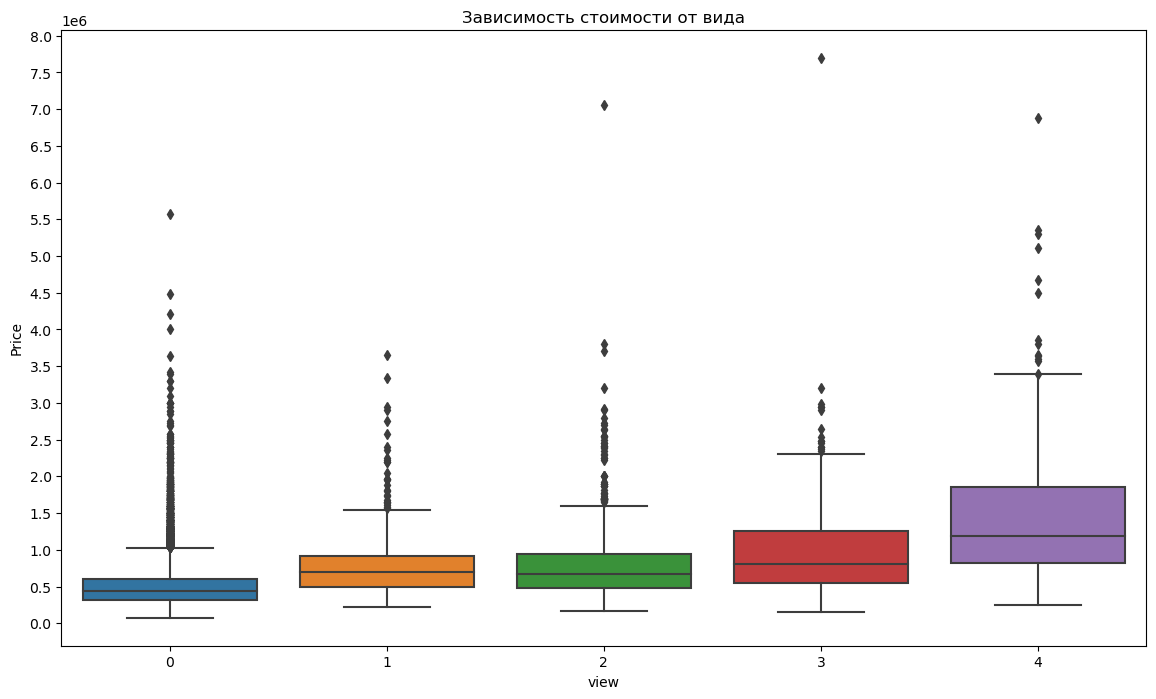

In [23]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=df['view'], y=df['price'])
plt.yticks(range(0, 8100000, 500000))
plt.xlabel('view')
plt.ylabel('Price')
plt.title('Зависимость стоимости от вида');

#### Зависимость закономерная, почти линейная.

In [24]:
df.sample(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2578,2954400520,20150430T000000,1237500.0,4,3.25,5180,49936,2.0,0,0,...,10,5180,0,1991,0,98053,47.6676,-122.069,4240,35363


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


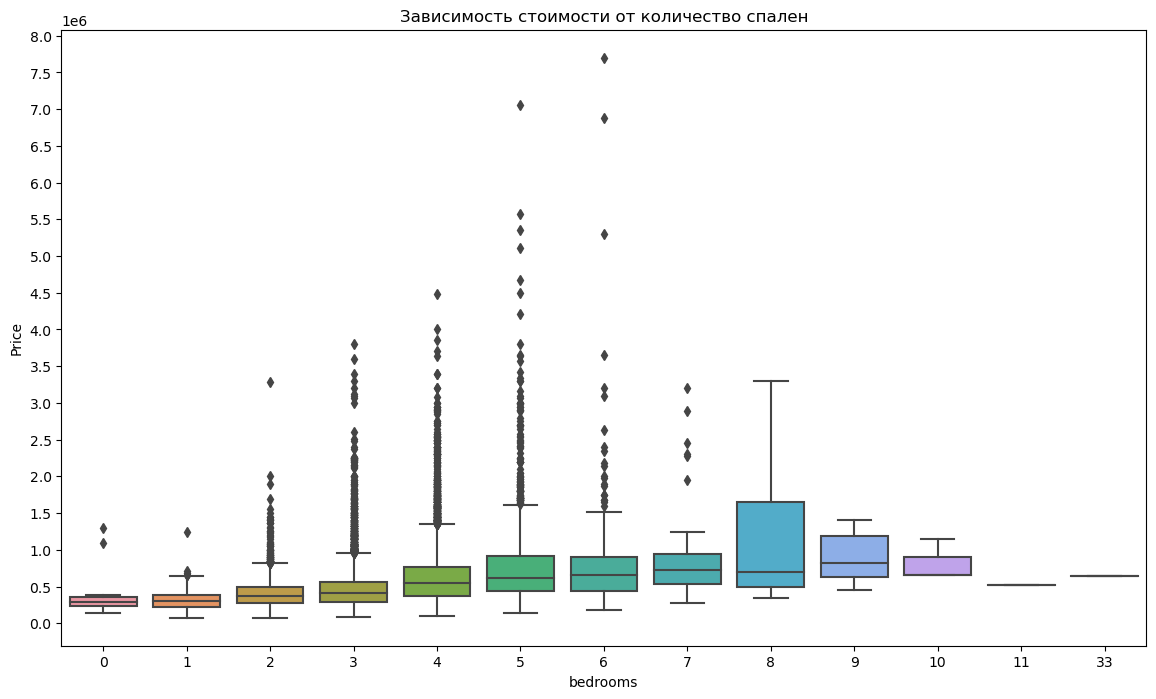

In [25]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=df['bedrooms'], y=df['price'])
plt.yticks(range(0, 8100000, 500000))
plt.xlabel('bedrooms')
plt.ylabel('Price')
plt.title('Зависимость стоимости от количество спален');

#### Чем больше тем дороже